#### Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [2]:
import tensorflow as tf

# Checking version of TensorFlow (which includes Keras)
print(f"TensorFlow Version {tf.__version__}")

TensorFlow Version 2.13.0


In [4]:
import keras
print(f"keras Version {keras.__version__}")

keras Version 2.13.1


#### Q2. Load the Wine Quality dataset and explore its dimensions.

In [85]:
import pandas as pd

# URL of the dataset
# url = "https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification"
url = "https://raw.githubusercontent.com/PriyaPocs/NeuralNetworkAssignments/main/wine.csv"


# Load the dataset from the URL
wine_data = pd.read_csv(url)

# Explore the dimensions of the dataset
rows, columns = wine_data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 1599
Number of columns: 12


#### Q3. Check for null values, identify categorical variables, and encode them.

In [86]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null valuesin the dataset

In [87]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


quality is  categorical

In [88]:
wine_data['quality'].unique()

array(['bad', 'good'], dtype=object)

In [89]:
wine_data['quality'].value_counts().unique()

array([855, 744])

As quality is the dependent feature with 2 catogorical values. So we can encode it good with 1 and bad with 0.

In [90]:
# Assuming 'wine_data' is your DataFrame
wine_data['quality'].replace({'bad': 0, 'good': 1}, inplace=True)

In [91]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [92]:
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


#### Q4. Separate the features and target variables from the dataframe.

In [93]:
# Separate the features (X) and target variable (y)
X = wine_data.drop(columns=['quality'])  # Features (all columns except 'quality')
y = wine_data['quality']  # Target variable (the 'quality' column)

# Now, X contains all the features, and y contains the target variable


#### Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [94]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Now you have X_train, y_train for training, X_val, y_val for validation, and X_test, y_test for testing


#### Q6. Scale the dataset using an appropriate scaling technique.

In [56]:
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling

In [95]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [96]:
scaled_X_train

array([[-0.36458197,  0.27028307, -0.88452628, ..., -1.50331912,
        -0.96231644, -0.61284241],
       [ 2.08646306, -0.82422292,  1.09972703, ..., -0.98778743,
        -0.29662295, -0.13057021],
       [ 0.86094055, -0.16751933,  1.09972703, ..., -0.02116552,
         0.70191728,  0.25524755],
       ...,
       [ 2.611687  , -1.26202532,  2.37168427, ..., -0.73002159,
         0.59096836,  0.35170199],
       [-0.4812984 ,  0.84489871, -1.03716115, ...,  0.4299247 ,
        -0.6294697 ,  0.44815643],
       [-1.06488055,  0.46182161, -1.39330918, ...,  0.94545638,
        -0.07472512, -1.19156904]])

#### Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [98]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=(X_train.shape[1],), name="inputLayer"),
          tf.keras.layers.Dense(64, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(32, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(1, activation="sigmoid", name="outputLayer")]

#### Q8. Create a Sequential model in Keras and add the previously designed layers to it.


In [99]:
model_clf = tf.keras.models.Sequential(LAYERS)

#### Q9. Print the summary of the model architecture.

In [100]:
model_clf.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 11)                0         
                                                                 
 hiddenLayer1 (Dense)        (None, 64)                768       
                                                                 
 hiddenLayer2 (Dense)        (None, 32)                2080      
                                                                 
 outputLayer (Dense)         (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.




In [1]:
LOSS_FUNCTION = "binary_crossentropy" 
OPTIMIZER = "adam" 
METRICS = ["accuracy"]

#### Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [101]:


model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


#### Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [102]:
# history = model_clf.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=2)
history = model_clf.fit(scaled_X_train, y_train, validation_data=(scaled_X_val, y_val), epochs=20, batch_size=32, verbose=2)

Epoch 1/20
32/32 - 0s - loss: 0.6377 - accuracy: 0.6354 - val_loss: 0.5965 - val_accuracy: 0.7148 - 233ms/epoch - 7ms/step
Epoch 2/20
32/32 - 0s - loss: 0.5533 - accuracy: 0.7263 - val_loss: 0.5533 - val_accuracy: 0.7500 - 26ms/epoch - 803us/step
Epoch 3/20
32/32 - 0s - loss: 0.5172 - accuracy: 0.7488 - val_loss: 0.5416 - val_accuracy: 0.7539 - 24ms/epoch - 752us/step
Epoch 4/20
32/32 - 0s - loss: 0.5034 - accuracy: 0.7537 - val_loss: 0.5361 - val_accuracy: 0.7578 - 24ms/epoch - 752us/step
Epoch 5/20
32/32 - 0s - loss: 0.4932 - accuracy: 0.7605 - val_loss: 0.5397 - val_accuracy: 0.7812 - 23ms/epoch - 717us/step
Epoch 6/20
32/32 - 0s - loss: 0.4892 - accuracy: 0.7586 - val_loss: 0.5350 - val_accuracy: 0.7969 - 24ms/epoch - 760us/step
Epoch 7/20
32/32 - 0s - loss: 0.4841 - accuracy: 0.7615 - val_loss: 0.5308 - val_accuracy: 0.7812 - 23ms/epoch - 729us/step
Epoch 8/20
32/32 - 0s - loss: 0.4752 - accuracy: 0.7664 - val_loss: 0.5352 - val_accuracy: 0.7891 - 24ms/epoch - 755us/step
Epoch 9/2

#### Q13. Obtain the model's parameters (weights and biases).

In [103]:
# Assuming you have already created and trained your model as shown in previous code

# Get the model's parameters
model_weights = model_clf.get_weights()

# Iterate through the model's layers and print the number of parameters in each layer
for i, layer_weights in enumerate(model_weights):
    if i < len(model_clf.layers):
        layer_name = model_clf.layers[i].name
        num_params = len(layer_weights)
        print(f"Layer '{layer_name}' has {num_params} parameters")
        

hidden1 = model_clf.layers[1]
print(hidden1.name)
print(len(hidden1.get_weights()[1]))
weights, biases = hidden1.get_weights()
print("weights.shape\n",weights.shape, "\n")
print("biases.shape\n", biases.shape)

Layer 'inputLayer' has 11 parameters
Layer 'hiddenLayer1' has 64 parameters
Layer 'hiddenLayer2' has 64 parameters
Layer 'outputLayer' has 32 parameters
hiddenLayer1
64
weights.shape
 (11, 64) 

biases.shape
 (64,)


#### Q14. Store the model's training history as a Pandas DataFrame.

In [104]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.637727,0.635386,0.596544,0.714844
1,0.553299,0.726295,0.553266,0.750000
2,0.517165,0.748778,0.541617,0.753906
3,0.503359,0.753666,0.536095,0.757812
4,0.493216,0.760508,0.539726,0.781250
5,0.489231,0.758553,0.535006,0.796875
6,0.484105,0.761486,0.530783,0.781250
7,0.475240,0.766373,0.535228,0.789062
8,0.469630,0.776149,0.525682,0.765625
9,0.466110,0.772238,0.535906,0.777344


#### Q15. Plot the model's training history.

Test Accuracy: 75.00%


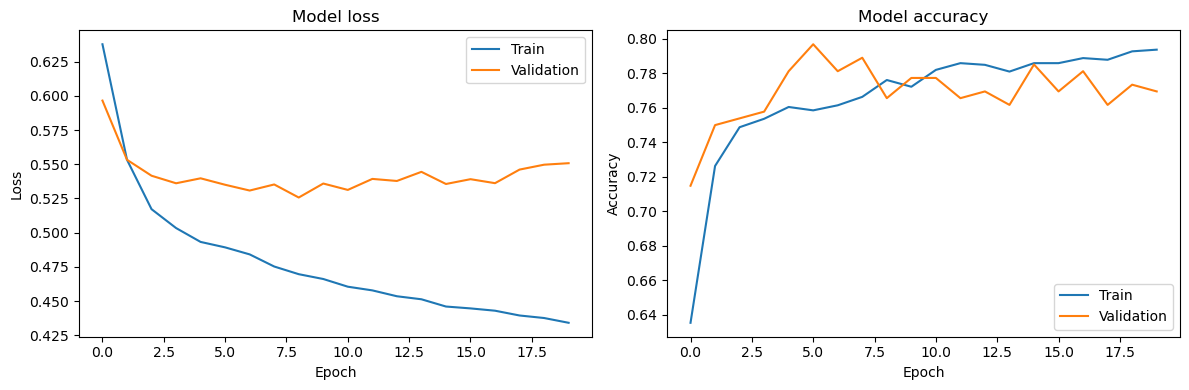

In [105]:
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

# Evaluate the model on the test set
test_loss, test_accuracy = model_clf.evaluate(scaled_X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Convert the model's training history to a Pandas DataFrame
history_df = pd.DataFrame(history.history)

# Plot the training history (loss and accuracy)
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Train')
plt.plot(history_df['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Train')
plt.plot(history_df['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


#### Q16. valuate the model's performance using the test dataset and report relevant metrics.

In [106]:
# Assuming you have already created and trained your model as shown in previous code

# Evaluate the model on the test set
test_loss, test_accuracy = model_clf.evaluate(scaled_X_test, y_test, verbose=0)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Print the test loss (optional)
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 75.00%
Test Loss: 0.4993
